In [1]:
import csv 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
td = pd.read_csv('titanic.csv', delimiter=',', encoding="utf-8-sig")

In [5]:
d = td.head(5)
d.append(td.tail(5))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


In [6]:
td.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
 td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [8]:
td["Age"].head(5)

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

In [55]:
td[["Age", "Sex"]].head(5).sort_values("Age")

,Age,Sex
0,22.0,male
2,26.0,female
3,35.0,female
4,35.0,male
1,38.0,female


In [56]:
td_copy = td.copy()

In [77]:
#td_copy["Relatives"] = td_copy[td_copy["SibSp"] != 0 | td_copy["Parch"]]

#td_copy[(td_copy["SibSp"] != 0) | (td_copy["Parch"] != 0)]
td_copy["Relatives"] = td_copy["SibSp"] + td_copy["Parch"] != 0

In [78]:
td_copy

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Relatives
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,True
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,False
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,False
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,True
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,False


In [79]:
td = td_copy

In [83]:
td.loc[440:451:2, ["Sex", "Age"]]

,Sex,Age
440,female,45.0
442,male,25.0
444,male,NaN
446,female,13.0
448,female,5.0
450,male,36.0


In [86]:
(td["Embarked"] == "S").sum()

644

In [87]:
td[td["Embarked"] == "S"].head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Relatives
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,True
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,False
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,False


In [101]:
men = (td["Sex"] == 'male')
mc = (men).sum()
mv = ((men) & (td["Survived"] == 1)).sum()
md = mc - mv
print(f"Мale: {mv} survived and {md} not")

Мale: 109 survived and 468 not


In [123]:
td_c = td.copy()
td_c = td_c.replace({'Pclass' : {1: "Элита", 2: "Средний класс", 3: "Работяги"}})

In [124]:
td_c["Fare_bin"] = (td_copy["Fare"] >= 20).replace({False: "Дёшево", True: "Дорого"})
td_c.dropna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Relatives,Fare_bin
0,1,0,Работяги,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,True,Дёшево
1,2,1,Элита,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,True,Дорого
2,3,1,Работяги,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,Дёшево
3,4,1,Элита,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,True,Дорого
4,5,0,Работяги,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,False,Дёшево
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,Средний класс,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,False,Дёшево
887,888,1,Элита,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,False,Дорого
888,889,0,Работяги,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,True,Дорого
889,890,1,Элита,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,False,Дорого


In [172]:
fc = (td["Pclass"] == 1)
sc = (td["Pclass"] == 2)
tc = (td["Pclass"] == 3)

survived = (td["Survived"] == 1)
class_names = td_c["Pclass"].unique().tolist() 

ws1 = [
    (fc & survived).sum(),
    (sc & survived).sum(),
    (tc & survived).sum()
]

ws2 = [
    100 * (fc & survived).sum() / fc.sum(),
    100 * (sc & survived).sum() / sc.sum(),
    100 * (tc & survived).sum() / tc.sum()
]

ws3 = [
    100 * (fc & survived).sum() / survived.sum(),
    100 * (sc & survived).sum() / survived.sum(),
    100 * (tc & survived).sum() / survived.sum()
]
print(ws3)
print(sum(ws3))

[39.76608187134503, 25.43859649122807, 34.7953216374269]
100.0


['Работяги', 'Элита', 'Средний класс'] [136, 87, 119]


(-1.1090467022644224,
 1.100430831306688,
 -1.1116124459459475,
 1.1184262911330627)

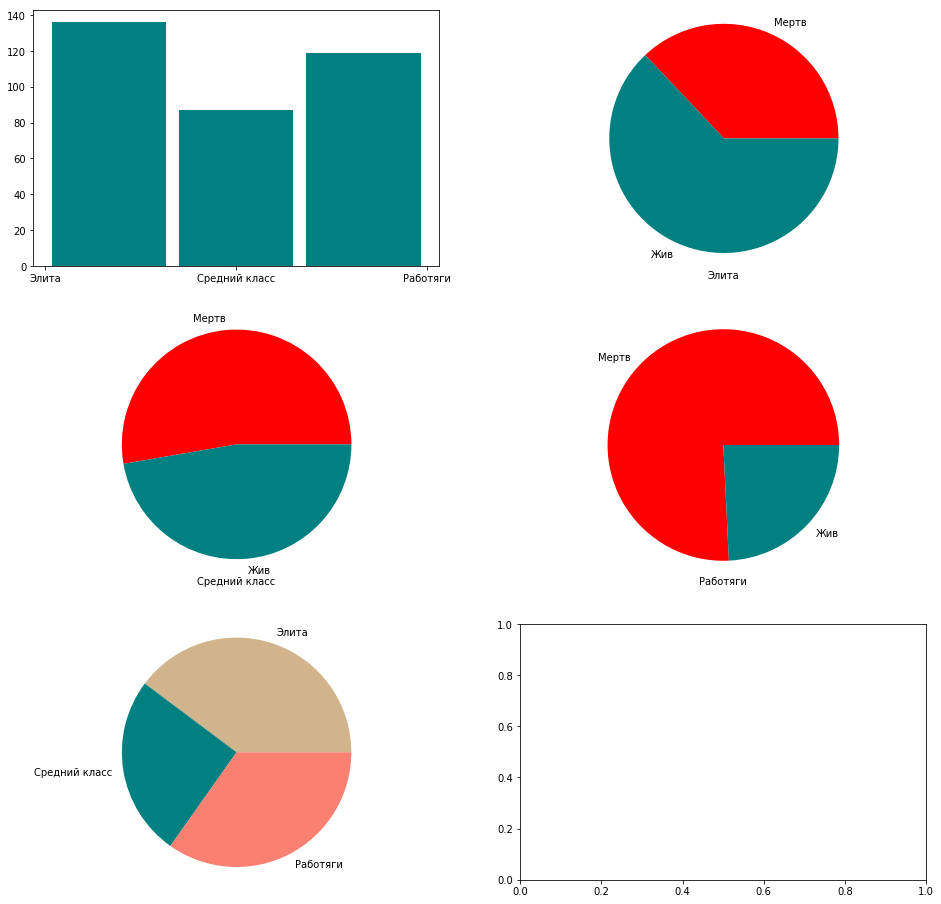

In [173]:
fig, ax = plt.subplots(3, 2, figsize=(16, 16))

print(class_names, ws)
ax[0][0].hist(['Элита', "Средний класс", "Работяги"], bins=3, weights=ws1, rwidth=0.9, color='teal')

ax[0][1].pie([100-ws2[0] ,ws2[0]], labels=["Мертв", "Жив"], colors=["red", "teal", ])
ax[0][1].axis("equal")
ax[0][1].set_xlabel('Элита')

ax[1][0].pie([100-ws2[1] ,ws2[1]], labels=["Мертв", "Жив"],  colors=["red", "teal", ])
ax[1][0].axis("equal")
ax[1][0].set_xlabel('Средний класс')

ax[1][1].pie([100-ws2[2] ,ws2[2]], labels=["Мертв", "Жив"],  colors=["red", "teal", ])
ax[1][1].axis("equal")
ax[1][1].set_xlabel('Работяги')

ax[2][0].pie(ws3, labels=['Элита', "Средний класс", "Работяги"],  colors=["tan", "teal", "salmon"])
ax[2][0].axis("equal")

In [131]:
males = (td["Sex"] == "male")
females = (td["Sex"] == "female")

survived = (td["Survived"] == 1)

ms = (males & survived).sum()
fs = (females & survived).sum()

ws1 = [ms, fs]
ws2 = [100 * ms/males.sum(), 100 * fs/females.sum()]

ws3 = [100 * ms/survived.sum(), 100 * fs/survived.sum()]
a = pd.DataFrame({"survived": ws1, 'sex': ['male', 'female']}, ['male', 'female'])
b = pd.DataFrame({"pt": ws2, 'sex': ['male', 'female']}, ['male', 'female'])

mm = pd.DataFrame(td[males]["Age"].dropna())
ff = pd.DataFrame(td[females]["Age"].dropna())




,variable,value
0,Age,22.0
1,Age,35.0
2,Age,54.0
3,Age,2.0
4,Age,20.0
...,...,...
448,Age,28.0
449,Age,25.0
450,Age,27.0
451,Age,26.0


AttributeError: 'list' object has no attribute 'get'

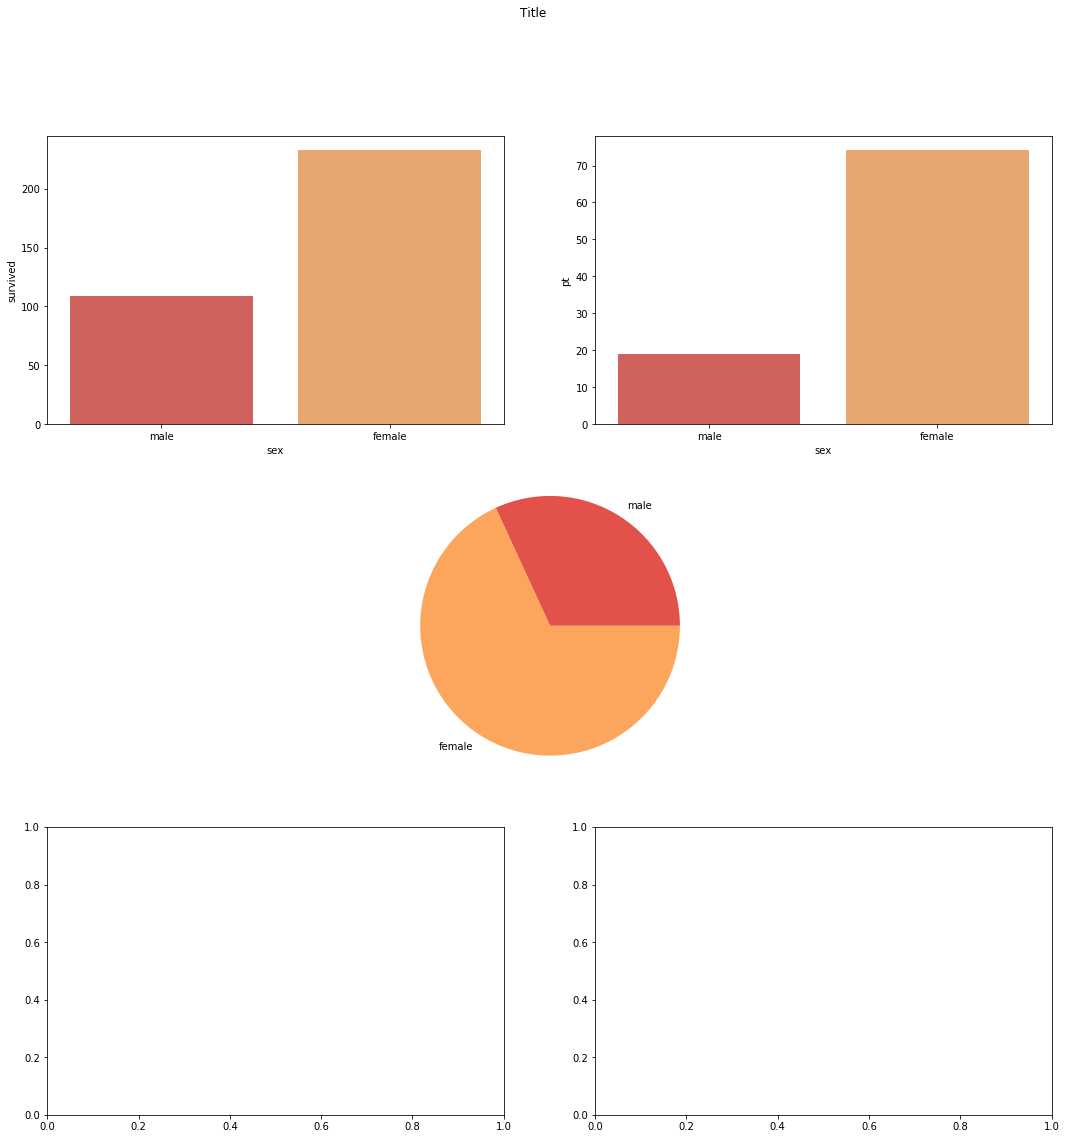

In [129]:
size = (3, 2)

fig, axes = plt.subplots(*size, figsize=(18, 18))

fig.suptitle('Title')
sns.barplot(data=a, y="survived", x="sex", ax=axes[0, 0], palette=sns.color_palette("Spectral"))
sns.barplot(data=b, y="pt", x="sex", ax=axes[0, 1], palette=sns.color_palette("Spectral"))

ax3 = plt.subplot2grid(size, (1, 0), colspan=2)
ax3.pie(ws3, labels=["male", "female"], colors=sns.color_palette("Spectral"))
ax3.axis("equal")

sns.boxplot(y='value', x='variable', data=[pd.melt(mm), pd.melt(ff)], whis='range', ax=axes[2, 0]) # palette=sns.color_palette("Spectral",4)
# sns.boxplot(ax=axes[0, 0], data=pokemon, x='Generation', y='Attack')
# sns.boxplot(ax=axes[0, 1], data=pokemon, x='Generation', y='Defense')
# sns.boxplot(ax=axes[0, 2], data=pokemon, x='Generation', y='Speed')
# sns.boxplot(ax=axes[1, 0], data=pokemon, x='Generation', y='Sp. Atk')
# sns.boxplot(ax=axes[1, 1], data=pokemon, x='Generation', y='Sp. Def')
# sns.boxplot(ax=axes[1, 2], data=pokemon, x='Generation', y='HP')

In [ ]:
s = (3,